In [375]:
# relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis

In this section I take a dive into the dataset to get a better understanding of what I am working with.  The next few blocks of code just layout the structure the dataset and provide some insight into what I should expect to see in terms of datatypes, values, and number of variables.

In [376]:
# read in the dataset
pd.set_option('display.width', None)
df = pd.read_csv('starcraft_player_data.csv')

In [377]:
# display first couple of rows in the dataset
df.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


In [378]:
df.tail()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
3390,10089,8,?,?,?,259.6296,0.020425,0.000743,9,0.000621,0.000146,0.004555,18.6059,42.8342,6.2754,46,0.000877,5,0.000000,0.000000
3391,10090,8,?,?,?,314.6700,0.028043,0.001157,10,0.000246,0.001083,0.004259,14.3023,36.1156,7.1965,16,0.000788,4,0.000000,0.000000
3392,10092,8,?,?,?,299.4282,0.028341,0.000860,7,0.000338,0.000169,0.004439,12.4028,39.5156,6.3979,19,0.001260,4,0.000000,0.000000
3393,10094,8,?,?,?,375.8664,0.036436,0.000594,5,0.000204,0.000780,0.004346,11.6910,34.8547,7.9615,15,0.000613,6,0.000000,0.000631
3394,10095,8,?,?,?,348.3576,0.029855,0.000811,4,0.000224,0.001315,0.005566,20.0537,33.5142,6.3719,27,0.001566,7,0.000457,0.000895


In [379]:
# display the dimensions of the dataset
df.shape

(3395, 20)

In [380]:
# check the data types of each column
df.dtypes

GameID                    int64
LeagueIndex               int64
Age                      object
HoursPerWeek             object
TotalHours               object
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object

In [381]:
# drop nulls and duplicates
df = df.dropna()
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3395 entries, 0 to 3394
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                3395 non-null   int64  
 1   LeagueIndex           3395 non-null   int64  
 2   Age                   3395 non-null   object 
 3   HoursPerWeek          3395 non-null   object 
 4   TotalHours            3395 non-null   object 
 5   APM                   3395 non-null   float64
 6   SelectByHotkeys       3395 non-null   float64
 7   AssignToHotkeys       3395 non-null   float64
 8   UniqueHotkeys         3395 non-null   int64  
 9   MinimapAttacks        3395 non-null   float64
 10  MinimapRightClicks    3395 non-null   float64
 11  NumberOfPACs          3395 non-null   float64
 12  GapBetweenPACs        3395 non-null   float64
 13  ActionLatency         3395 non-null   float64
 14  ActionsInPAC          3395 non-null   float64
 15  TotalMapExplored     

The columns Age, HoursPerWeek, and TotalHours were showing up as objects instead of ints.  This could lead to errors later on, so I turned them into the proper datatype

In [382]:
# Age, HoursPerWeek, and TotalHours are showing up as objects instead of ints
# convert these columns into ints
columns_to_convert = ['Age', 'HoursPerWeek', 'TotalHours']

for col in columns_to_convert:
    df = df[df[col] != '?'] # values of ? found in columns
    df[col] = pd.to_numeric(df[col])

In [383]:
df.describe()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000
mean,4719.552127,4.120731,21.650389,15.909527,960.421809,114.575763,0.004023,0.000364,4.316357,0.000094,0.000380,0.003433,40.713819,64.209584,5.266955,22.116836,0.001031,6.541043,0.000060,0.000142
std,2656.919630,1.448170,4.206357,11.964495,17318.133922,48.111912,0.004726,0.000210,2.333322,0.000159,0.000359,0.000966,17.057191,19.037394,1.500605,7.440875,0.000520,1.859049,0.000112,0.000266
min,52.000000,1.000000,16.000000,0.000000,3.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.632600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,2423.250000,3.000000,19.000000,8.000000,300.000000,79.231500,0.001245,0.000202,3.000000,0.000000,0.000139,0.002743,29.326600,50.886425,4.261525,17.000000,0.000682,5.000000,0.000000,0.000000
50%,4788.000000,4.000000,21.000000,12.000000,500.000000,107.070300,0.002445,0.000349,4.000000,0.000039,0.000278,0.003376,37.058900,61.296100,5.087050,22.000000,0.000904,6.000000,0.000000,0.000020
75%,6994.750000,5.000000,24.000000,20.000000,800.000000,140.156100,0.004945,0.000493,6.000000,0.000113,0.000508,0.004003,48.510425,74.032525,6.027350,27.000000,0.001258,8.000000,0.000087,0.000182
max,9271.000000,7.000000,44.000000,168.000000,1000000.000000,389.831400,0.043088,0.001648,10.000000,0.003019,0.003688,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


# Correlation between variables

In this section I want to see which variables I could use for my model.  I want to see which variables are most correlated with our target which is LeagueIndex.  Since all the datatypes in the dataset are integers and floats I decided to go with a correlation matrix.

Using Seaborn and MatPlotLib, the correlation matrix created below shows how each variable is correlated with LeagueIndex(our target variable).  I found that APM, NumberOfPACs, SelecyByHotkeys, AssignToHotkeys, ActionLatency, and GapBetweenPACs were the highest correlated to LeagueIndex with at least a correlation of  plus or minus 0.40 or above.

APM and ActionLatency had the highest correlation with 0.62 and -0.66, respectively, while SelectByHotkeys was the lowest with 0.43.  Compared to other variables these were the highest correlated therefore I decided to use these for my model.


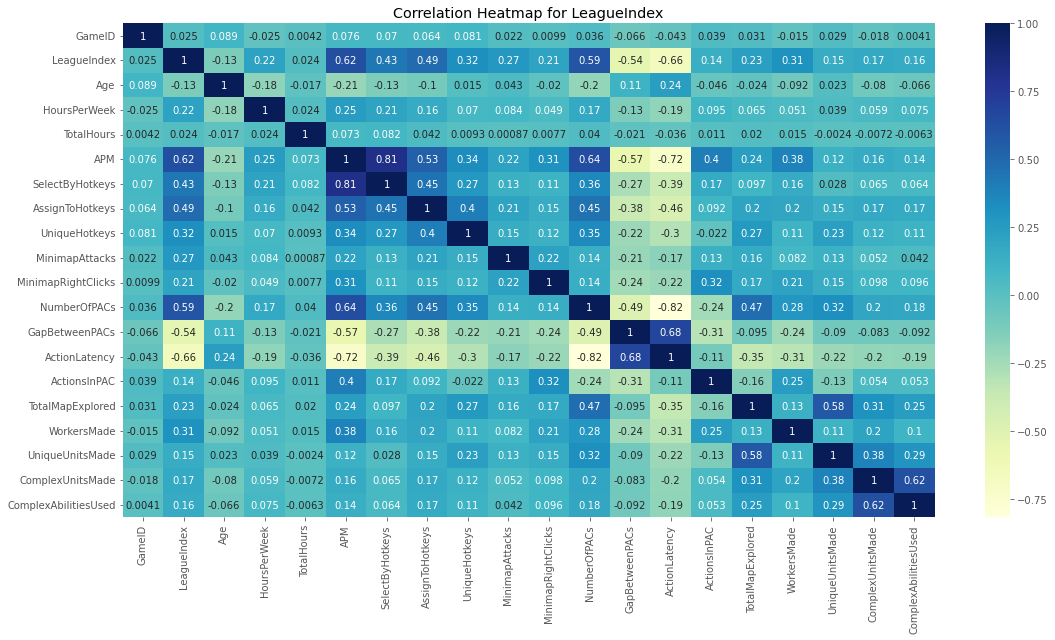

In [384]:
# create a heatmap to show correlation between variables
corr_matrix = df.corr()

fig,ax = plt.subplots(figsize = (16, 9))

sns.heatmap(corr_matrix, annot = True, cmap = 'YlGnBu', ax= ax)
ax.set_title("Correlation Heatmap for LeagueIndex")
fig.tight_layout()
plt.show()

Taking a closer look into the correlation matrix.

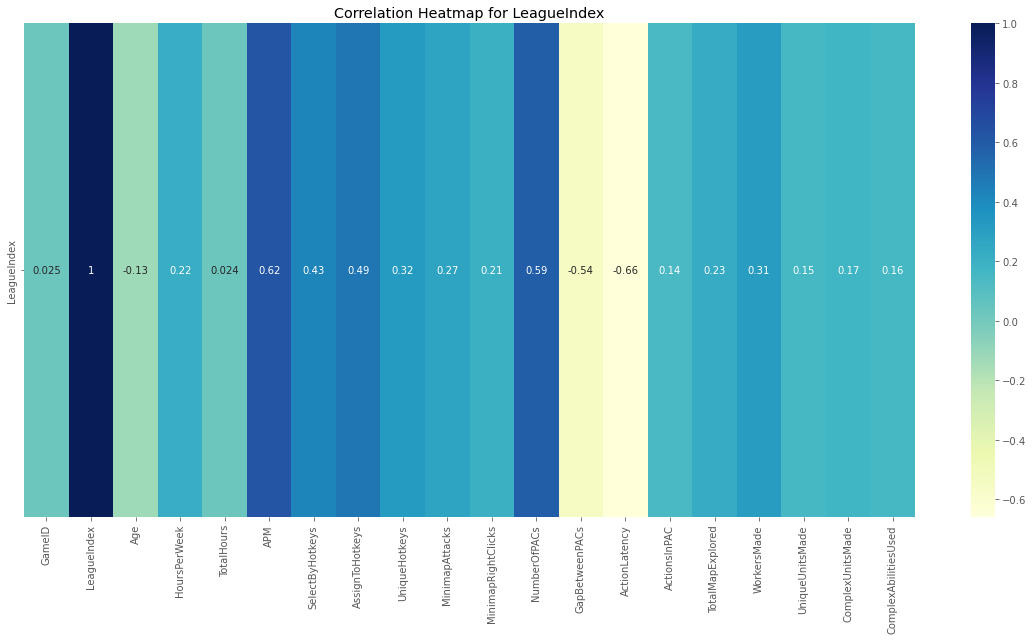

In [385]:
# create a heatmap to show correlation between variables
corr_matrix = df.corr()

# Select only the "LeagueIndex" row from the correlation matrix
leagueindex_corr = corr_matrix.loc[['LeagueIndex']]

fig,ax = plt.subplots(figsize = (16, 9))

sns.heatmap(leagueindex_corr, annot = True, cmap = 'YlGnBu', ax= ax)
ax.set_title("Correlation Heatmap for LeagueIndex")
fig.tight_layout()
plt.show()

In [386]:
# create new dataframe with just the correlated variables
df_filtered = df[['APM', 'NumberOfPACs','SelectByHotkeys','AssignToHotkeys', 'ActionLatency', 'GapBetweenPACs',  'LeagueIndex']]
df_filtered.head()

,APM,NumberOfPACs,SelectByHotkeys,AssignToHotkeys,ActionLatency,GapBetweenPACs,LeagueIndex
0,143.7180,0.004849,0.003515,0.000220,40.8673,32.6677,5
1,129.2322,0.004307,0.003304,0.000259,42.3454,32.9194,5
2,69.9612,0.002926,0.001101,0.000336,75.3548,44.6475,4
3,107.6016,0.003783,0.001034,0.000213,53.7352,29.2203,3
4,122.8908,0.002368,0.001136,0.000327,62.0813,22.6885,3


As we can see from this new correlation matrix we can see the correlation to LeagueIndex more clearly.  We can also see the correlation between each variable. Some observations:

1. APM has a high correlation with SelectByHotkeys (0.81) meaning as APM gets higher SelectByHotkeys gets higher.
2. High negative correlation between NumberOfPACs and ActionLatency (-0.82) meaning as NumberOfPACs gets lower and viceversa

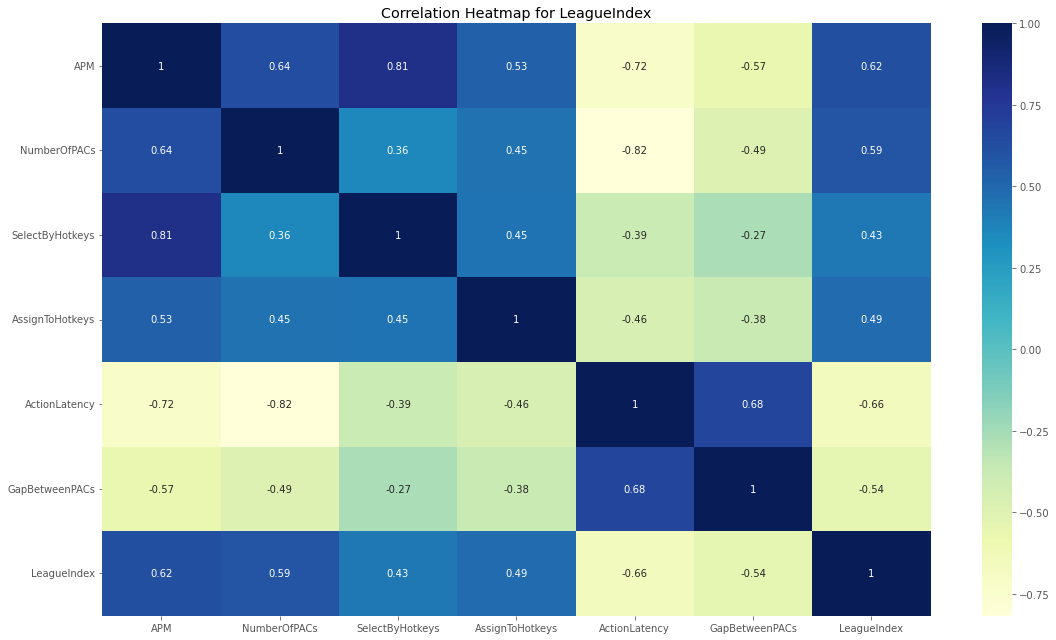

In [387]:
# create new correlation matrix for new dataframe
# create a heatmap to show correlation between variables
corr_matrix = df_filtered.corr()

# Select only the "LeagueIndex" column from the correlation matrix
# leagueindex_corr = corr_matrix['LeagueIndex']

fig,ax = plt.subplots(figsize = (16, 9))

# sns.heatmap(leagueindex_corr.to_frame(), annot = True, cmap = 'YlGnBu', ax= ax)
sns.heatmap(corr_matrix, annot = True, cmap = 'YlGnBu', ax= ax)
ax.set_title("Correlation Heatmap for LeagueIndex")
fig.tight_layout()
plt.show()

# Ditribution of data for each variable

This section views the distribution of each of the variables selected for the model.  Overall each variable seems to be evenly distributed which is good because it shows the data isn't that skewed.  There is one exception with SelectByHotkeys as it does seem to skew right. 

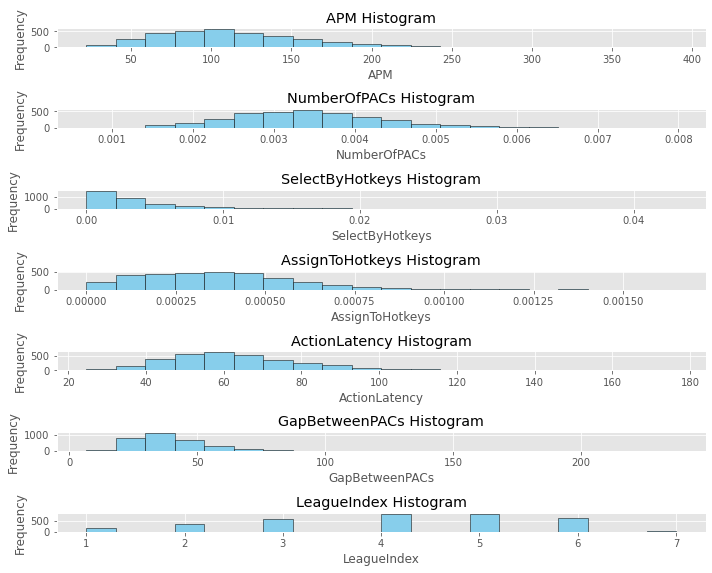

In [388]:
# create histograms for each column and their frequency
# Get the column names of the DataFrame
columns = df_filtered.columns

# Create subplots for each column
fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(10, 8))

# Iterate over the columns and create histograms
for i, column in enumerate(columns):
    ax = axes[i]
    ax.hist(df_filtered[column], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(column + ' Histogram')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

# Create model using variables

I have my variables that I wanted to use and now comes choosing the model.  

I decided to go with a decision tree classification model.  This model made the most sense because it can handle the non-linear nature of our data.  It is easy to use and interpret and can help classify, based on our features, what rank a player is the easiest.

In [389]:
# import relevant packages
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [390]:
# split the dataset into feature(X) and target (y) variables 
X = df_filtered.drop(columns= 'LeagueIndex')
y = df_filtered['LeagueIndex']

In [391]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=42)

Decision trees have a tendency to overfit the training data.  To avoid this I implemented a cross-validation to figure out which hyperparameters to use for our final model.  

This helps ensure that we do not generalize to unseen data which would skew our results. 

In [396]:
# run a cross validation to find the most optimal hyperparameters
from sklearn.model_selection import GridSearchCV

clf=DecisionTreeClassifier()

# Define the parameter grid for hyperparameter search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
}

# Create the GridSearchCV object with cross-validation
gscv = GridSearchCV(estimator=clf, param_grid=param_grid)
# fit the model with the training set
gscv.fit(X_train, y_train)

# Get the best hyperparameters and the best score
best_score = gscv.best_score_
# find the best hyperparameters
best_params = gscv.best_params_

# Print the best hyperparameters and the best score
print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Score: 0.37902621722846447


In [397]:
# create decision tree classifier based on optimal hyperparams
clf = DecisionTreeClassifier(criterion= 'entropy',max_depth = 5,
                             max_features='auto', min_samples_leaf= 2, 
                             min_samples_split= 10)

In [398]:
# train and make predictions of data

# Train the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluating our model

The final model has been fitted with the proper parameters and data and below is our accuracy score and classification report.

The overall accuracy score of this model is 0.375 which means that the model correctly predicts a players rank 35.7% of the time. 

From the classification report we can see that the model was most accurate when it came to class 6 with a precision of 0.57.  The remaining classes saw a precision ranging between 0.28 and 0.36 with class 7 actually having 0 precision.

In [399]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, zero_division=0)

# Print the results
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.37574850299401197
Classification Report:
              precision    recall  f1-score   support

           1       0.32      0.25      0.28        24
           2       0.36      0.22      0.27        69
           3       0.28      0.33      0.30       102
           4       0.33      0.50      0.40       151
           5       0.33      0.21      0.26       157
           6       0.57      0.54      0.56       161
           7       0.00      0.00      0.00         4

    accuracy                           0.38       668
   macro avg       0.31      0.29      0.29       668
weighted avg       0.38      0.38      0.37       668



# Hypothetical

From this model I would highly suggest looking to collect more data.  The current model does not predict with an accuracy score high enough to my liking and I feel that it would benefit from having substantially more data.

Based on EDA of the dataset and my results from the model I believe there could be many other variables that could be used to determine the rank of a player.  There did not seem to be that high correlation to LeagueIndex across the board (I'd prefer at least a 0.70 correlation) and the accuracy of the model is not to my liking as well.

Overall, accurately predicting a players rank because a lot of different factors outside of just numbers could play into it.  The way a player thinks and makes decisions or the environment a player is in could also have an effect on their rank.  I believe taking the time to collet more data would be beneficial to the model and can lead to much more accurate results than with the provided data.